In [1]:
%load_ext autoreload
%autoreload 1
%aimport geometric_sampling

In [10]:
import geometric_sampling as gs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from package_sampling.utils import inclusion_probabilities
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon

In [53]:
swiss_df = pd.read_csv('swiss.csv')
coords = swiss_df[['COORD_X', 'COORD_Y']].to_numpy()
N = len(coords)
n = 10
probs = inclusion_probabilities(swiss_df['AREA'].to_numpy(), n)
# rng = gs.random.rng()
# probs = rng.unequal_probabilities(n, N)

/mnt/e/Codes/geometric-sampling/.venv/lib/python3.12/site-packages/package_sampling/utils/inclusion_probabilities.py:40: UserWarning: There are zero values in the initial vector `a`.
  warnings.warn("There are zero values in the initial vector `a`.", UserWarning)


In [54]:
method = gs.sampling.KMeansSpatialSampling(coords, probs, n=n, n_zones=(2, 2), tolerance=3)
pop = method.population

/mnt/e/Codes/geometric-sampling/geometric_sampling/clustering/aggregate.py:106: RuntimeWarning: divide by zero encountered in scalar divide
  ((self.Ti[old_cluster] - self.Ti[new_cluster]) / (2*np.sum(self.X_features[data_index])))
/mnt/e/Codes/geometric-sampling/geometric_sampling/clustering/aggregate.py:112: RuntimeWarning: divide by zero encountered in scalar divide
  ((self.Ti[old_cluster] - self.goal) / np.sum(self.X_features[data_index])),
/mnt/e/Codes/geometric-sampling/geometric_sampling/clustering/aggregate.py:113: RuntimeWarning: divide by zero encountered in scalar divide
  ((self.goal - self.Ti[new_cluster]) / np.sum(self.X_features[data_index])),


In [58]:
for i, cluster in enumerate(pop.clusters):
    print(f'\n===== CLUSTER {i+1} =====')
    print(f'total = {np.sum(cluster.units[:, 3])}, number of zones = {len(cluster.zones)}')
    print('Zones:')
    for j, zone in enumerate(cluster.zones):
        print(f'zone = {j+1}, total = {np.sum(zone.units[:, 3])}')


===== CLUSTER 1 =====
total = 1.33372713460504, number of zones = 5
Zones:
zone = 1, total = 0.25
zone = 2, total = 0.25
zone = 3, total = 0.25
zone = 4, total = 0.25
zone = 5, total = 0.24999999999999997

===== CLUSTER 2 =====
total = 1.0, number of zones = 4
Zones:
zone = 1, total = 0.24999999999999992
zone = 2, total = 0.25
zone = 3, total = 0.25
zone = 4, total = 0.25

===== CLUSTER 3 =====
total = 0.6463325096220526, number of zones = 3
Zones:
zone = 1, total = 0.25
zone = 2, total = 0.24999999999999997
zone = 3, total = 0.25

===== CLUSTER 4 =====
total = 1.1798421281590876, number of zones = 5
Zones:
zone = 1, total = 0.24999999999999997
zone = 2, total = 0.25
zone = 3, total = 0.24999999999999994
zone = 4, total = 0.25
zone = 5, total = 0.25000000000000006

===== CLUSTER 5 =====
total = 0.9913610108262918, number of zones = 4
Zones:
zone = 1, total = 0.2499999999999999
zone = 2, total = 0.25
zone = 3, total = 0.24999999999999997
zone = 4, total = 0.25

===== CLUSTER 6 =====
to

<Axes: >

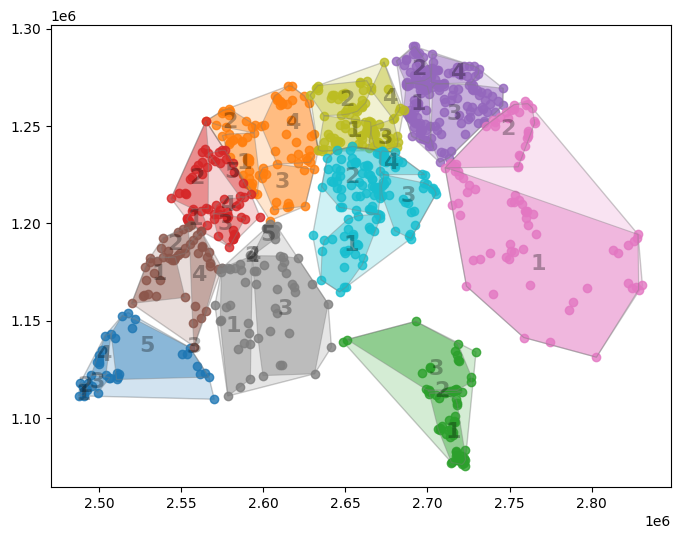

In [57]:
pop.plot()